In [7]:
import numpy as np
import matplotlib.pyplot as plt
import plotfancy as pf

In [10]:
a = np.load('FD_samples.npz')
noise = a['noise']
modif = noise**2

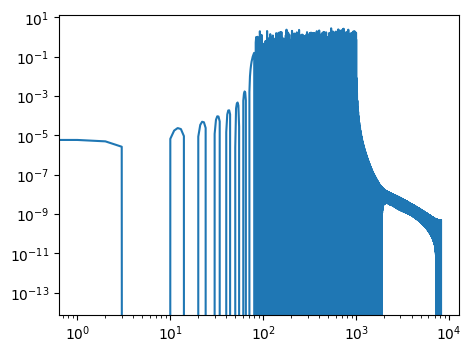

In [13]:
fig, ax1 = pf.create_plot()
ax1.loglog(n)

In [31]:
from gwpy.timeseries import TimeSeries

strain = TimeSeries.fetch_open_data('H1', 1126259447, 1126285311)
psd = strain.psd(fftlength=16, overlap=8, window='tukey')

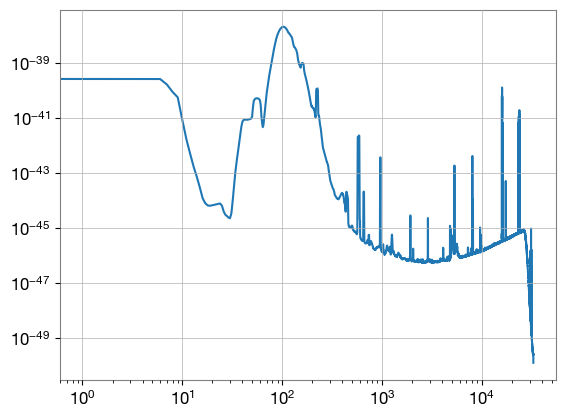

In [29]:
import numpy as np
from scipy.signal import convolve

# Moving average window size
window_size = 10

# Create boxcar kernel (sums to 1)
kernel = np.ones(window_size) / window_size

# Convolve with 'same' mode to keep output size same as input
x_smooth = convolve(psd, kernel, mode='same')
plt.loglog(x_smooth)

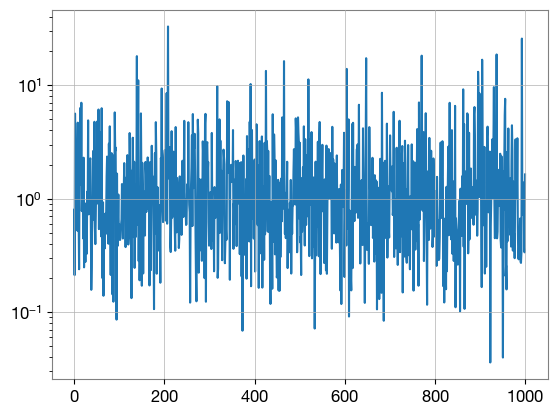

In [36]:
Nbins=1000
grid = np.linspace(1, 1024, Nbins)
plt.plot(np.random.lognormal(0,1,size=np.shape(grid)))
plt.yscale('log')

In [41]:
import torch
np.shape(torch.linspace(1, 1024, Nbins).unsqueeze(0))

torch.Size([1, 1000])